In [10]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
df_iris = pd.read_csv('./data/Iris.csv')

df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# remove unnecessary column 
df_iris.drop("Id", axis=1, inplace=True)

df_iris_X = df_iris[['SepalLengthCm', "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
df_iris_y = df_iris['Species']

df_iris_y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [12]:
df_iris_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=36) 
tree_clf.fit(df_iris_X, df_iris_y)

DecisionTreeClassifier(max_depth=2, random_state=36)

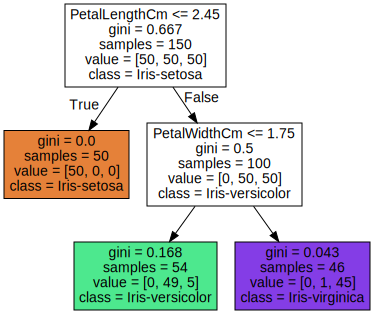

In [16]:
# visualize the trained Decision Tree
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 

labels = df_iris_X.columns
graph = Source(tree.export_graphviz(tree_clf, feature_names=labels, class_names=df_iris_y.unique(), max_depth=2, filled=True))
display(SVG(graph.pipe(format='svg')))

In [17]:
tree_clf.predict_proba([[1,1, 5, 1.5]])

/Users/faa/anaconda3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.90740741, 0.09259259]])

In [18]:
tree_clf.predict([[1,1, 5, 1.5]])

/Users/faa/anaconda3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

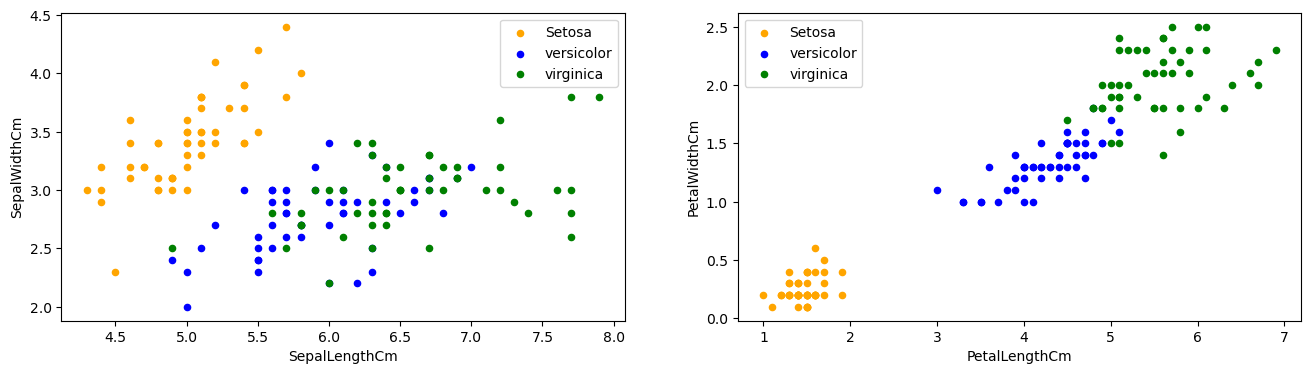

In [19]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,4)

df_iris[df_iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa', ax = ax1)
df_iris[df_iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=ax1)
df_iris[df_iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=ax1)

df_iris[df_iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa', ax = ax2)
df_iris[df_iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=ax2)
df_iris[df_iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=ax2)

plt.show()


In [21]:
from sklearn.tree import DecisionTreeRegressor

melb_data = pd.read_csv("./data/melb_data.csv")

melb_data_X = melb_data[['Rooms','Bathroom','Landsize','Lattitude','Longtitude']]
melb_data_y = melb_data['Price']

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(melb_data_X, melb_data_y)

DecisionTreeRegressor(max_depth=2)

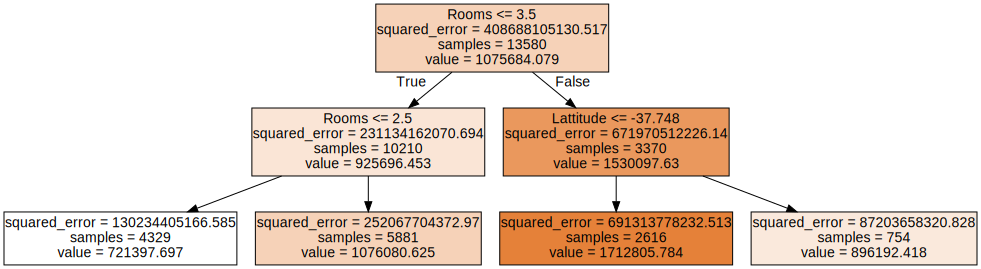

In [22]:
# Visualize the trained Decision Tree by export_graphviz() method

labels = melb_data_X.columns

graph = Source(tree.export_graphviz(tree_reg ,feature_names = labels, max_depth = 2, filled = True))
display(SVG(graph.pipe(format='svg')))

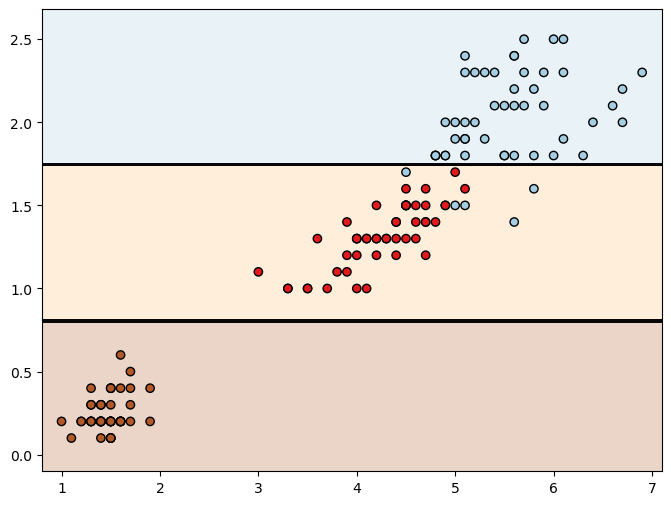

In [24]:
# plot decision boundries 
import numpy as np

def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')




# Load the dataset
df_iris = pd.read_csv("./data/Iris.csv")

# The reason for using two-dimensional numerical data is that we want to show the examples visually.
df_iris_X = df_iris[['PetalLengthCm','PetalWidthCm']]
df_iris_y = df_iris.Species

# convert dataframe to numpy array
df_iris_X = df_iris_X.to_numpy()
df_iris_y = df_iris_y.astype('category').cat.codes

# Fit on classifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(df_iris_X, df_iris_y)

plot_decision_boundary(tree_clf, df_iris_X, df_iris_y)
